<a href="https://colab.research.google.com/github/Himalaypatel75/ML-Hello-World/blob/main/Machine_Learning_FCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv("magic04.data", names = cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
df["class"].unique()

array(['g', 'h'], dtype=object)

In [ ]:
df["class"] = (df["class"] == "g").astype(int)

In [ ]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


4.2835
334.177


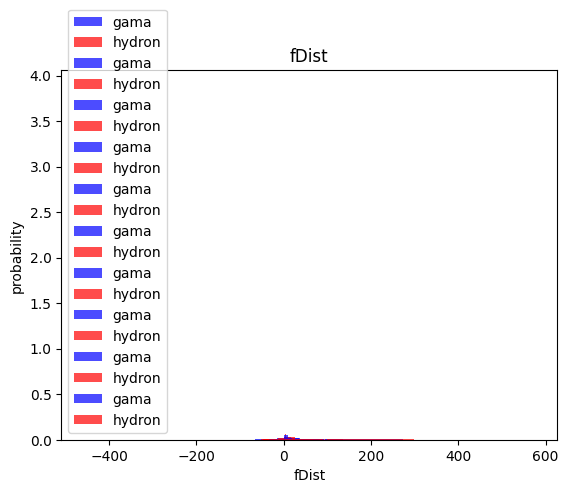

In [ ]:
print(df["fLength"].min())
print(df["fLength"].max())

for label in cols[:-1]:
  plt.hist(df[df["class"] == 1][label], color='blue', label='gama', alpha=0.7, density = True)
  plt.hist(df[df["class"] == 0][label], color='red', label='hydron', alpha=0.7, density = True)
  plt.title(label)
  plt.ylabel("probability")
  plt.xlabel(label)
  plt.legend()
  # plt.show()


In [ ]:
train, valid, test = np.split(df.sample(frac = 1), [int(0.6*len(df)), int(0.8*len(df))]) #split data for testing and validation.

In [ ]:
def scane_dataset(dataframe):
    x = dataframe[dataframe.cols[:-1]].values
    print(x, "-x")
    y = dataframe[dataframe.cols[-1]].values
    print(y, "-y")


    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    print(x, "-x")
    print(np.reshape(y, (-1,1)), "-yy")
    print(len(y), "--")

    data = np.hstack((x, np.reshape(y, (-1,1))))

    return data, x, y

In [ ]:
train

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
3018,19.2398,11.9090,2.4541,0.5659,0.3533,1.9924,-7.1701,-11.0978,47.0555,221.7930,1
1467,65.9033,16.4847,3.1472,0.2252,0.1336,56.4520,60.6612,7.2997,1.3080,243.8080,1
8248,24.8621,17.4983,2.6469,0.3811,0.1995,22.3126,25.0444,6.9124,30.8760,127.0880,1
3400,18.8887,12.2503,2.4691,0.6248,0.4024,-14.1020,-17.0104,-8.0801,5.4480,167.4410,1
4638,26.8136,12.9271,2.5004,0.5719,0.3428,13.8773,22.0226,6.0542,0.7080,209.8880,1
...,...,...,...,...,...,...,...,...,...,...,...
13000,126.6906,35.1435,2.9217,0.2681,0.1430,131.2240,97.9527,19.9734,65.8786,90.5509,0
6380,31.2490,20.8416,2.6196,0.3361,0.2005,-6.8301,24.4418,-16.2498,22.1785,146.6680,1
10624,68.0565,38.6090,2.8686,0.3383,0.1834,9.0836,28.8960,17.9971,13.7508,320.8550,1
17902,184.2240,165.8860,3.5461,0.0808,0.0448,-260.1700,93.8146,121.1810,3.7745,70.1499,0
